# Лабораторная работа №4. Синтез КИХ-фильтров.
Лаборатория цифровой обработки сигналов, МФТИ

| Вариант                                                                	| 0    	| 1 	| 2 	| 3 	| 4 	| 5 	| 6 	|
|:------------------------------------------------------------------------:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| Частота дискретизации $f_s$ Гц                                         	| 2000	| 5000	| 5500	| 6000	| 6500	| 7000	| 7500	|
| граничная частота полосы пропускания $f_1$ Гц                          	| 450  	| 500 	| 650 	| 800 	| 950 	| 1100	| 1250	|
| граничная частота полосы задерживания $f_2$ Гц                         	| 550  	| 750 	| 925 	| 1100	| 1275	| 1450	| 1625	|
| максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$  	| 0.1  	| 0.05	| 0.05	| 0.05	| 0.05	| 0.05	| 0.05	|
| максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$ 	| 0.05 	| 0.02 	| 0.02	| 0.02	| 0.02	| 0.02	| 0.02	|

In [98]:
fs = 5500
f1 = 650
f2 = 925
delta1 = 0.05
delta2 = 0.02

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import plotly.express as px
import plotly.graph_objects as go

# Модуль 1. Метод частотной выборки синтеза КИХ-фильтров

## Задача 1.1. Синтез ФНЧ по идеальной АЧХ. 

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с частотой среза $f_c=(f_1+f_2)/2$ методом частотной выборки. Частоту дискретизации принять равной $f_s$.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. 

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику КИХ-фильтра. Определить по виду импульсной характеристики, будет ли фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

/tmp/ipykernel_29863/693851643.py:24: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ml, sl, bl = plt.stem(fs*np.arange(N)/N, abs(H),


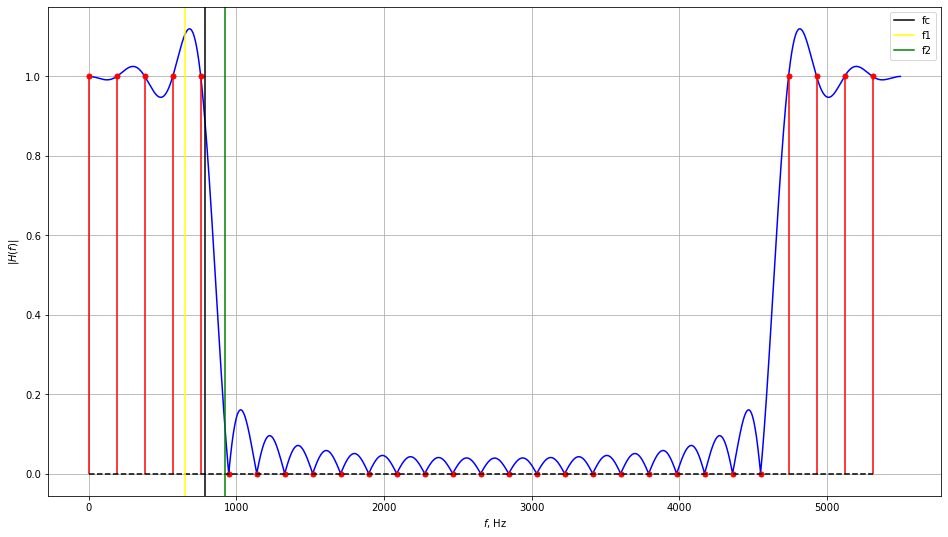

In [57]:
# б)
fc = (f1 + f2)/2
N = 29

@np.vectorize
def ideal_lowpass(f, fc, fs):
    if 0 <= f <= fc or fs-fc <= f <= fs:
        return 1.0 + 0.0j
    else:
        return 0.0 + 0.0j

plt.figure(figsize=(16, 9))
f_band = np.linspace(0, fs, 10240)
# plt.fill_between(f_band, abs(ideal_lowpass(f_band, fc=fc, fs=fs)), \
# edgecolor = 'k', hatch = '//',  alpha = 0.3, facecolor = 'red', )

H = ideal_lowpass(fs*np.arange(N)/N, fc=fc, fs=fs)
h = np.roll(np.fft.ifft(H), N//2)
M = 1024*8
H1 = abs(np.fft.fft(h, M))

#imitating DTFT
plt.plot(fs*(np.arange(M)/M), abs(H1), color = 'blue')

ml, sl, bl = plt.stem(fs*np.arange(N)/N, abs(H),
                      'r', basefmt = 'k--', markerfmt = 'ro', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.axvline(x=fc, label='fc', c='black')
plt.axvline(x=f1, label='f1', c='yellow')
plt.axvline(x=f2, label='f2', c='green')
plt.legend()
plt.xlabel("$f$, Hz")
plt.ylabel("$|H(f)|$")
plt.grid()
plt.show()

In [58]:
# а)
print(np.max(20*np.log10(abs(abs(abs(H1)[np.where(fs*(np.arange(M)/M)<=f1)]-1)))))
print(np.max(20*np.log10(abs(H1))[np.logical_and(fs*np.arange(M)/M>=f2,fs*(np.arange(M)/M)<=fs-f2)]))

-19.658424097773853
-15.895740351623118


$\delta_{pass} = -18.66$ dB,$\quad$
$\delta_{stop} = -15.90$ dB.

/tmp/ipykernel_29863/1100655636.py:5: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ml, sl, bl = plt.stem(np.arange(N), h.real, 'r', basefmt = 'k--', markerfmt = 'ro',


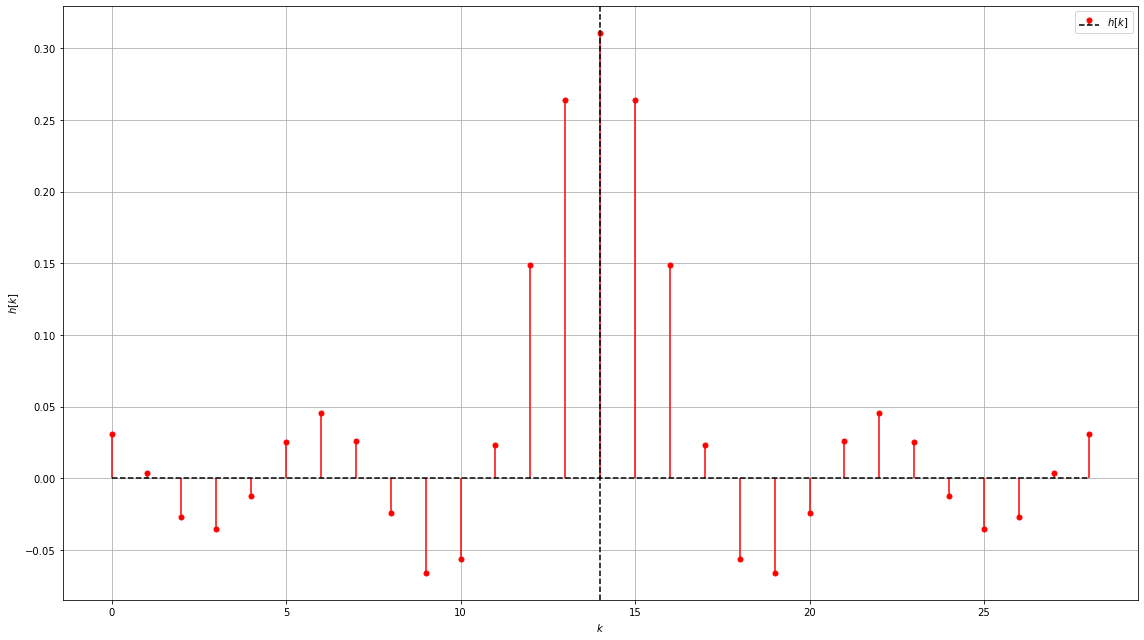

In [61]:
# в)
fig, ax = plt.subplots(figsize=(16, 9))
H = ideal_lowpass(fs*np.arange(N)/N, fc=fc, fs=fs)
h = np.roll(np.fft.ifft(H), N//2)
ml, sl, bl = plt.stem(np.arange(N), h.real, 'r', basefmt = 'k--', markerfmt = 'ro', 
                          label="$h[k]$", use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.axvline(N//2, ls = '--', color = 'black')
    
plt.grid()
plt.ylabel('$h[k]$')
plt.xlabel('$k$')

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

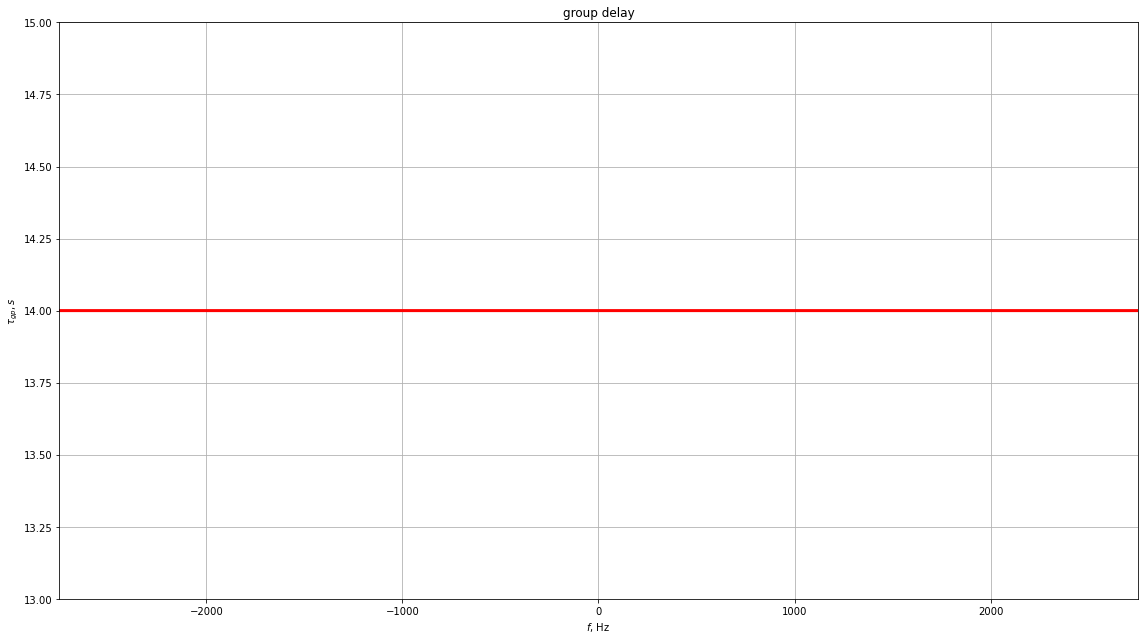

In [62]:
# г)
nu, gd = signal.group_delay((h.real, [1]), w=np.linspace(-0.5+1e-6, 0.5-1e-6, num=2048), fs=fs)

fig, ax = plt.subplots(figsize=(16, 9))
plt.title('group delay')
plt.plot(nu*fs, gd*1, 'r', lw = 3)
plt.ylabel('$\\tau_{{gp}}, s$')
plt.xlabel('$f$, Hz')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xlim(-fs/2, fs/2)
plt.grid()
plt.tight_layout()

## Задача 1.2. Синтез ФНЧ по непрерывной АЧХ.

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с граничной частотой полосы пропускания $f_1$ и с граничной частотой полосы задерживания $f_2$ методом частотной выборки. Частоту дискретизации принять равной $f_s$. Частотную характеристику идеального фильтра в полосе перехода аппроксимировать линейной функцией так, чтобы характеристика была непрерывной.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатом в задаче 1.1.

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

д) Определить частоту среза (по уровню $-3$ дБ) модельного и полученного фильтров. 

/tmp/ipykernel_29863/670156954.py:26: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ml, sl, bl = plt.stem(fs*np.arange(N)/N, abs(H),


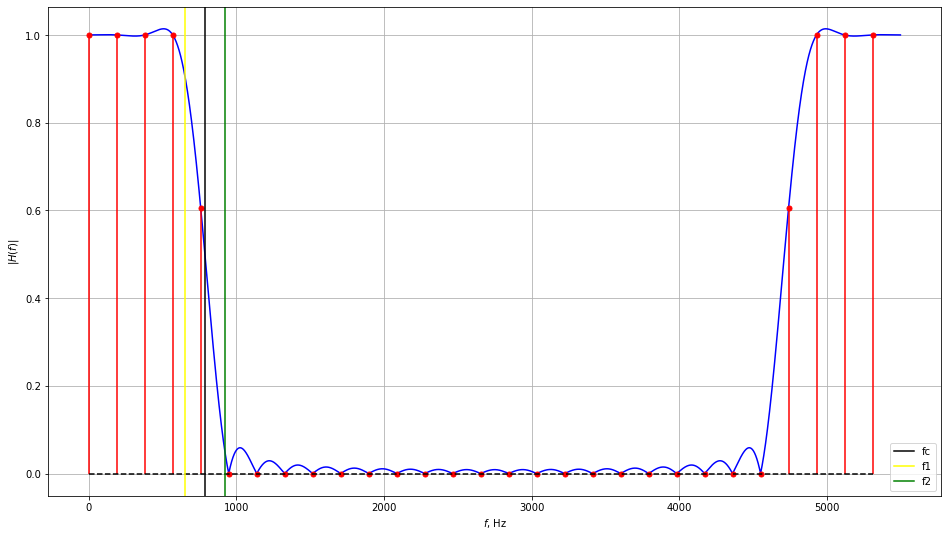

In [63]:
# б
fc = (f1 + f2)/2
N = 29

@np.vectorize
def ideal_lowpass_continuous(f, fs, f1, f2):
    if 0 <= f <= f1 or fs-f1 <= f <=  fs:
        return 1.0
    elif f1 < f < f2: 
        return f/(f1-f2)+(f2/(f2-f1))
    elif fs-f2 < f < fs-f1:
        return f/(f2-f1)+(fs-f2)/(-f2+f1)
    else:
        return 0.0 

plt.figure(figsize=(16, 9))
f_band = np.linspace(0, fs, 10240)
H = ideal_lowpass_continuous(fs*np.arange(N)/N, fs=fs, f1=f1, f2=f2)
h = np.roll(np.fft.ifft(H), N//2)
M = 1024*8
H1 = abs(np.fft.fft(h, M))

#imitating DTFT
plt.plot(fs*(np.arange(M)/M), abs(H1), color = 'blue')

ml, sl, bl = plt.stem(fs*np.arange(N)/N, abs(H),
                      'r', basefmt = 'k--', markerfmt = 'ro', use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.axvline(x=fc, label='fc', c='black')
plt.axvline(x=f1, label='f1', c='yellow')
plt.axvline(x=f2, label='f2', c='green')
plt.legend()
plt.xlabel("$f$, Hz")
plt.ylabel("$|H(f)|$")
plt.grid()
plt.show()

In [64]:
#a + д
print(np.max(20*np.log10(abs(abs(abs(H1)[np.where(fs*(np.arange(M)/M)<=f1)]-1)))))
print(np.max(20*np.log10(abs(H1))[np.logical_and(fs*np.arange(M)/M>=f2,fs*(np.arange(M)/M)<=fs-f2)]))

-20.793661016845736
-24.603791684426163


$\delta_{pass} = -20.8$ dB,$\quad$
$\delta_{stop} = -24.6$ dB.

$-3$ dB: $f_c^{real} = 729$ Hz, $\quad f_c^{ideal} = 731.5$ Hz.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[fc]*2, y=[-100, 10], showlegend = False,
                        mode = 'lines', line = dict(dash='dot', color = 'black')))
fig.add_trace(go.Scatter(x=[f1]*2, y=[-100, 10], showlegend = False,
                        mode = 'lines', line = dict(dash='dash', color = 'black')))
fig.add_trace(go.Scatter(x=[f2]*2, y=[-100, 10], showlegend = False,
                        mode = 'lines', line = dict(dash='dash', color = 'black')))
fig.add_trace(go.Scatter(x=fs*(np.arange(M)/M), y=20*np.log10(abs(H1)), showlegend = False,
                        mode = 'lines', line = dict(dash='solid')))
fig.add_trace(go.Scatter(x=f_band, y = 20*np.log10(abs(ideal_lowpass_continuous(f_band, fs = fs, f1 = f1, f2 = f2))), showlegend = False,
                        mode = 'lines', line = dict(dash='solid')))


fig.update_yaxes(title_text="|H(f)|, dB")
fig.update_xaxes(title_text="f, Hz")
fig.update_yaxes(range=[-40, 10])
fig.update_xaxes(showspikes=True, spikecolor="red", spikethickness=2)
fig.update_yaxes(showspikes=True, spikecolor="red", spikesnap="cursor", spikemode="across", spikethickness=2)

fig.update_layout(height=800, width=1500,)
fig.update_layout(hoverlabel_namelength=-1)
fig.write_html('task_12.html')
fig.show()

/tmp/ipykernel_29863/2941938672.py:4: MatplotlibDeprecationWarning:

Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.



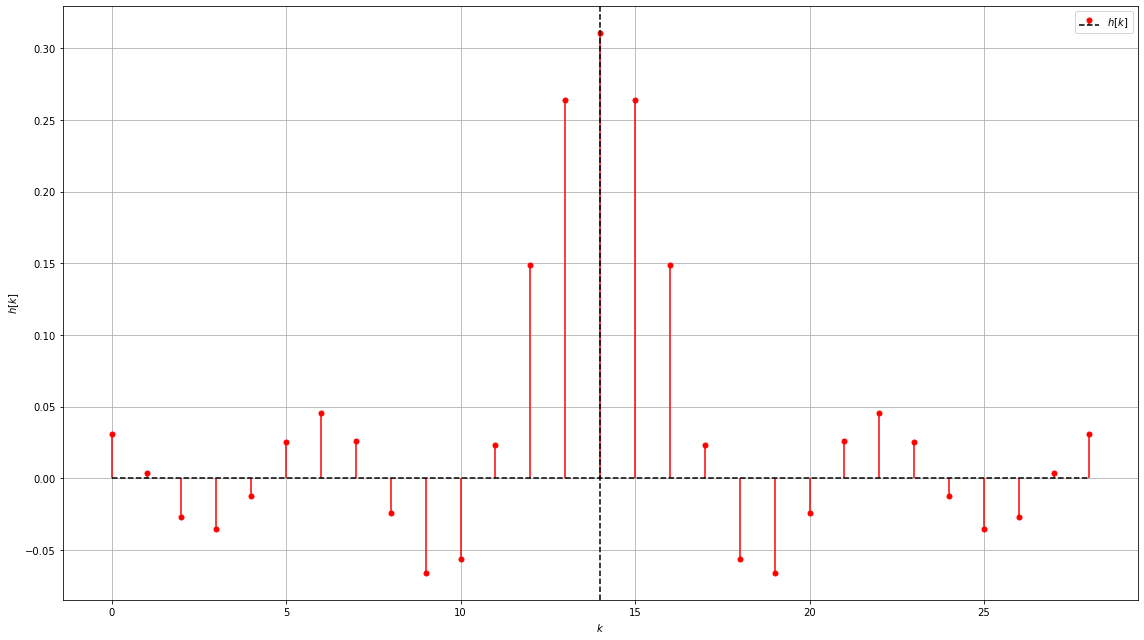

In [74]:
fig, ax = plt.subplots(figsize=(16, 9))
H = ideal_lowpass(fs*np.arange(N)/N, fc=fc, fs=fs)
h = np.roll(np.fft.ifft(H), N//2)
ml, sl, bl = plt.stem(np.arange(N), h.real, 'r', basefmt = 'k--', markerfmt = 'ro', 
                          label="$h[k]$", use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.axvline(N//2, ls = '--', color = 'black')
    
plt.grid()
plt.ylabel('$h[k]$')
plt.xlabel('$k$')

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

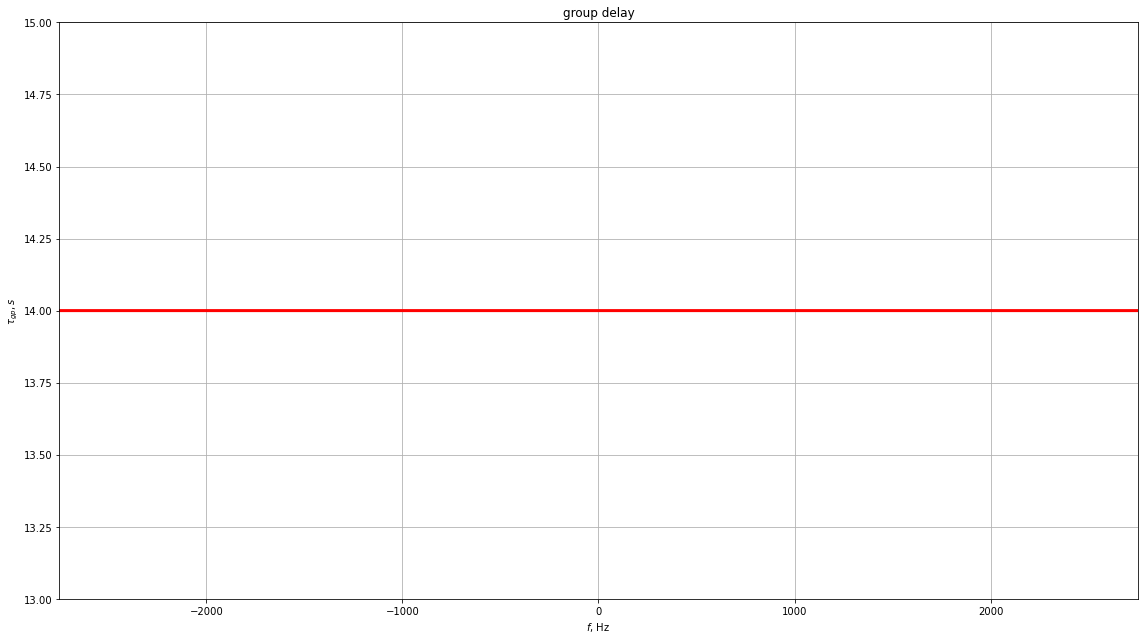

In [75]:
nu, gd = signal.group_delay((h.real, [1]), w=np.linspace(-0.5+1e-6, 0.5-1e-6, num=2048), fs=fs)

fig, ax = plt.subplots(figsize=(16, 9))
plt.title('group delay')
plt.plot(nu*fs, gd*1, 'r', lw = 3)
plt.ylabel('$\\tau_{{gp}}, s$')
plt.xlabel('$f$, Hz')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xlim(-fs/2, fs/2)
plt.grid()
plt.tight_layout()

## Задача 1.3*. Синтез фильтра с характеристикой «приподнятый косинус»

Синтезировать КИХ-фильтр 28 порядка ($N=29$) с частотой среза $f_c=(f_1+f_2)/2$  на основе фильтра приподнятого косинуса методом частотной выборки. Частоту дискретизации принять равной $f_s$. На интервале $[-f_s/2, f_s/2]$ частотная характеристика фильтра задается следующим образом 

$$H(f)=\left\{ \begin{matrix}
   1, & |f| < (1-\beta)f_c;\\
   \dfrac{1}{2}*\left( 1+\cos \left(\pi \dfrac{|f|-(1-\beta)f_c}{2\beta f_c} \right) \right), & (1-\beta) f_c \le |f| \le (1+\beta)f_c;  \\
   0,   &  |f| > (1+\beta)f_c. \\
\end{matrix} \right.$$

а) Подобрать такое $\beta$, чтобы модельный фильтр не выходил за максимально допустимые отклонения АЧХ в полосе пропускания и в полосе задерживания ($\delta_1$ и $\delta_2$). Изобразить полученную АЧХ фильтра.

б) Для синтезированного фильтра определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатами в задаче 1.1 и задаче 1.2.

в) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

г) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

д) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (г).

е) Определить частоту среза (по уровню $-3$ дБ) полученного фильтра. Сравнить с задачей 1.2.


In [79]:
fc = (f1 + f2)/2
N = 29

@np.vectorize
def ideal_rc(f, beta, fc, fs):
    if f > 0.5*fs:
        f = fs - f
    
    if abs(f) <= (1 - beta)*fc:
        return 1.0
    elif abs(f) > (1 + beta)*fc: 
        return 0.0
    else:
        return 0.5 * (1 + np.cos(np.pi*(abs(f) - (1-beta)*fc)/(2*beta*fc)))
    
N=29
fc=(f1+f2)/2


/tmp/ipykernel_29863/1472169277.py:12: MatplotlibDeprecationWarning:

Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.



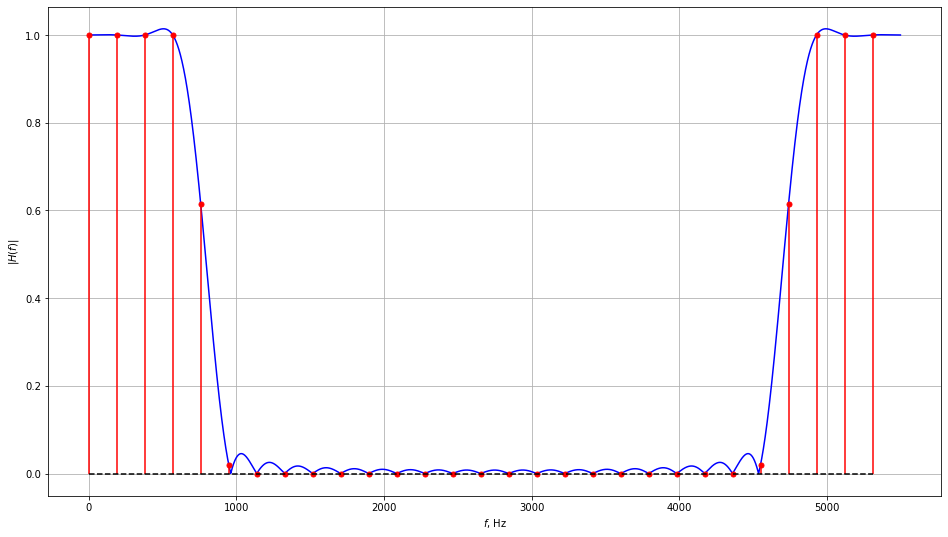

In [88]:
plt.figure(figsize=(16, 9))

f_band = np.linspace(0, fs, 10240)
beta = 0.25

H = ideal_rc(fs*np.arange(N)/N, beta = beta, fc = fc, fs = fs)
h = np.roll(np.fft.ifft(H), N//2)
M = 1024*8
H1 = abs(np.fft.fft(h, M))
plt.plot(fs*(np.arange(M)/M), abs(H1), color = 'blue')

ml, sl, bl = plt.stem(fs*np.arange(N)/N, abs(H),
                      'r', basefmt = 'k--', markerfmt = 'ro', use_line_collection=True)
plt.setp(ml, markersize = 5)

plt.xlabel("$f$, Hz")
plt.ylabel("$|H(f)|$")
plt.grid()
plt.show()

In [87]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[-fs/2, -f2, -f2], y=[20*np.log10(delta2), 20*np.log10(delta2), 10],
                         legendgroup = 'bounds', showlegend = True, 
                         mode = 'lines', line = dict(dash='dot', color = 'black'), name = 'stopband bound'))
fig.add_trace(go.Scatter(x=[f2, f2, fs/2], y=[10, 20*np.log10(delta2), 20*np.log10(delta2)], 
                        legendgroup = 'bounds', showlegend = False,
                        mode = 'lines', line = dict(dash='dot', color = 'black'), name = 'stopband bound'))
fig.add_trace(go.Scatter(x=[-f1, -f1, f1, f1], y=[-100, 20*np.log10(1-delta1), 20*np.log10(1-delta1), -100], 
                        legendgroup = 'bounds', showlegend = True,
                        mode = 'lines', line = dict(dash='dot', color = 'black'), name = 'passband bound'))
fig.add_trace(go.Scatter(x=[-f1, -f1, f1, f1], y=[10, 20*np.log10(1+delta1), 20*np.log10(1+delta1), 10], 
                        legendgroup = 'bounds', showlegend = False,
                        mode = 'lines', line = dict(dash='dot', color = 'black'), name = 'passband bound'))

f_band = np.linspace(-fs/2., fs/2., 10240)
for beta in [0.25]:
    fig.add_trace(go.Scatter(x=f_band, y=20*np.log10(abs(ideal_rc(f_band, beta = beta, fc = fc, fs = fs))), 
                              mode = 'lines', line = dict(dash='dash'), name = f'ideal RC, beta = {round(beta, 3)}'))
    H = ideal_rc(fs*(np.arange(N)/N-0.5), beta = beta, fc = fc, fs = fs)
    h = np.roll(np.fft.ifft(H), N//2)
    M = 1024*8
    H1 = abs(np.fft.fft(h, M))
    fig.add_trace(go.Scatter(x=fs*((np.arange(M)/M)-0.5), y=20*np.log10(abs(H1)),
                        mode = 'lines', line = dict(dash='solid'), name = f'RC, beta = {round(beta, 3)}'))
    

fig.update_yaxes(title_text="|H(f)|, dB")
fig.update_xaxes(title_text="f, Hz")
fig.update_yaxes(range=[-80, 10])
fig.update_xaxes(showspikes=True, spikecolor="red", spikethickness=2)
fig.update_yaxes(showspikes=True, spikecolor="red", spikesnap="cursor", spikemode="across", spikethickness=2)

fig.update_layout(height=800, width=1500,)
fig.update_layout(hoverlabel_namelength=-1)
fig.write_html('task_13.html')
fig.show()

/tmp/ipykernel_29863/2872492893.py:17: RuntimeWarning:

divide by zero encountered in log10



In [92]:
print("delta pass = ", np.max(20*np.log10(abs(abs(abs(H1)[np.where(fs*(np.arange(M)/M)<=f1)]-1)))))
print("delta stop = ", np.max(20*np.log10(abs(H1))[np.logical_and(fs*np.arange(M)/M>=f2,fs*(np.arange(M)/M)<=fs-f2)]))

delta pass =  -20.92152242102095
delta stop =  -23.71968271385958


-3dB: $f_{real} = 735$, $f_{ideal} = 731$

/tmp/ipykernel_29863/3063167639.py:5: MatplotlibDeprecationWarning:

Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.



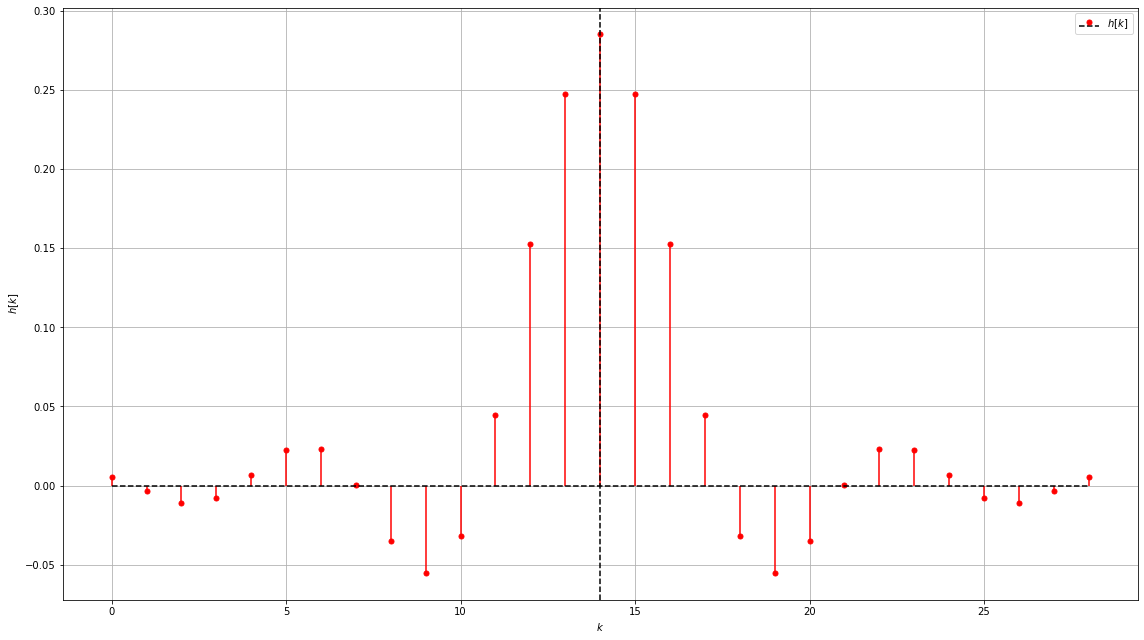

In [93]:
#г
fig, ax = plt.subplots(figsize=(16, 9))
H = ideal_rc(fs*np.arange(N)/N, beta = beta, fc = fc, fs = fs)
h = np.roll(np.fft.ifft(H), N//2)
ml, sl, bl = plt.stem(np.arange(N), h.real, 'r', basefmt = 'k--', markerfmt = 'ro', 
                          label="$h[k]$", use_line_collection=True)
plt.setp(ml, markersize = 5)
plt.axvline(N//2, ls = '--', color = 'black')
    
plt.grid()
plt.ylabel('$h[k]$')
plt.xlabel('$k$')

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()


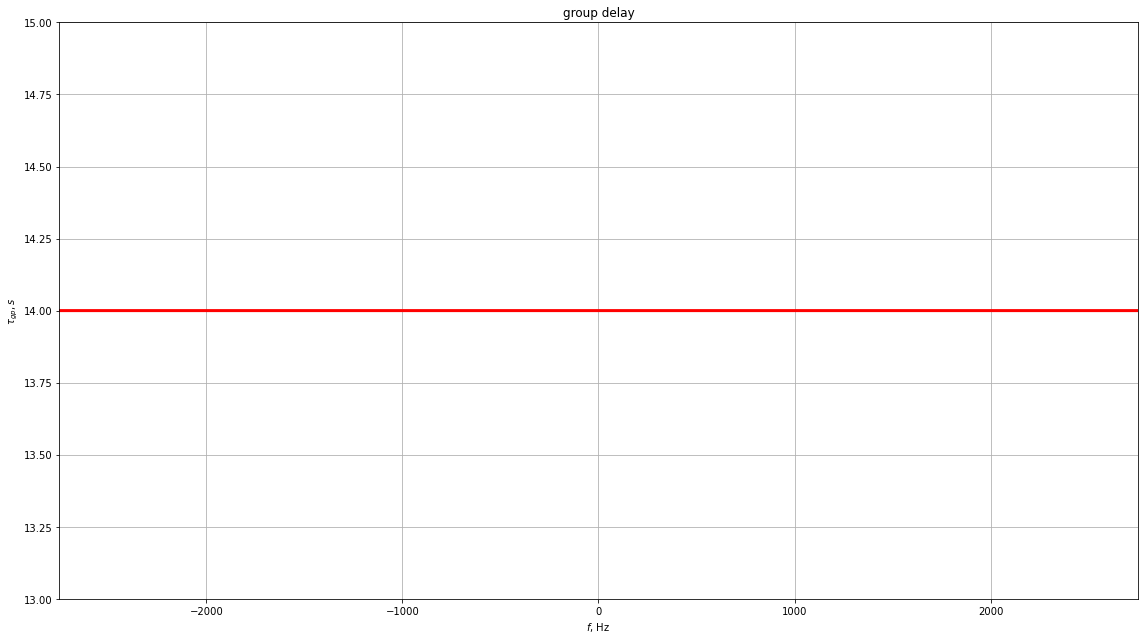

In [94]:
#д
nu, gd = signal.group_delay((h.real, [1]), w=np.linspace(-0.5+1e-6, 0.5-1e-6, num=2048), fs=fs)

fig, ax = plt.subplots(figsize=(16, 9))
plt.title('group delay')
plt.plot(nu*fs, gd*1, 'r', lw = 3)
plt.ylabel('$\\tau_{{gp}}, s$')
plt.xlabel('$f$, Hz')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xlim(-fs/2, fs/2)
plt.grid()
plt.tight_layout()

#  Модуль 2. Метод окон для синтеза КИХ-фильтров

### Задача 2.1. Сравнение АЧХ фильтров одного порядка 
Синтезировать КИХ-фильтры нижних частот c частотой среза $f_c$ при частоте дискретизации $f_s$ порядка $R=28$ ($N=29$) с использованием следующих окон:

* прямоугольное (окно Дирихле)
$$w[k]=\left\{ \begin{matrix}
   1,  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

* окно Ханна 
$$w[k]=\left\{ \begin{matrix}
   0,5-0,5\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Хэмминга
$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Блэкмана
$$w[k]=\left\{ \begin{matrix}
   0,42-0,5\cos \dfrac{2\pi k}{N-1}+0,08\cos \dfrac{4\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

Построить графики оконной функции $w[k]$, импульсной характеристики КИХ-фильтра $h[k]$, АЧХ КИХ-фильтра(в линейном масштабе и в дБ). Определить по графикам максимальный уровень пульсаций по полосе задерживания в дБ. Заполнить таблицу.

|Окно, применяемое для синтеза фильтра |Частота среза, по уровню -3дБ, Гц |Максимальный уровень пульсаций, дБ | Ширина переходной зоны, Гц |
|:-------:|:-|:-|:-|
|Дирихле  ||||
|Ханна    ||||
|Хэмминга ||||
|Блэкмана ||||



In [95]:
N = 29
R = N - 1
fc = (f1 + f2) / 2

/tmp/ipykernel_29863/1403330230.py:5: MatplotlibDeprecationWarning:

Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.

/tmp/ipykernel_29863/1403330230.py:5: MatplotlibDeprecationWarning:

Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.

/tmp/ipykernel_29863/1403330230.py:5: MatplotlibDeprecationWarning:

Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.

/tmp/ipykernel_29863/1403330230.py:5: MatplotlibDeprecationWarning:

Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.



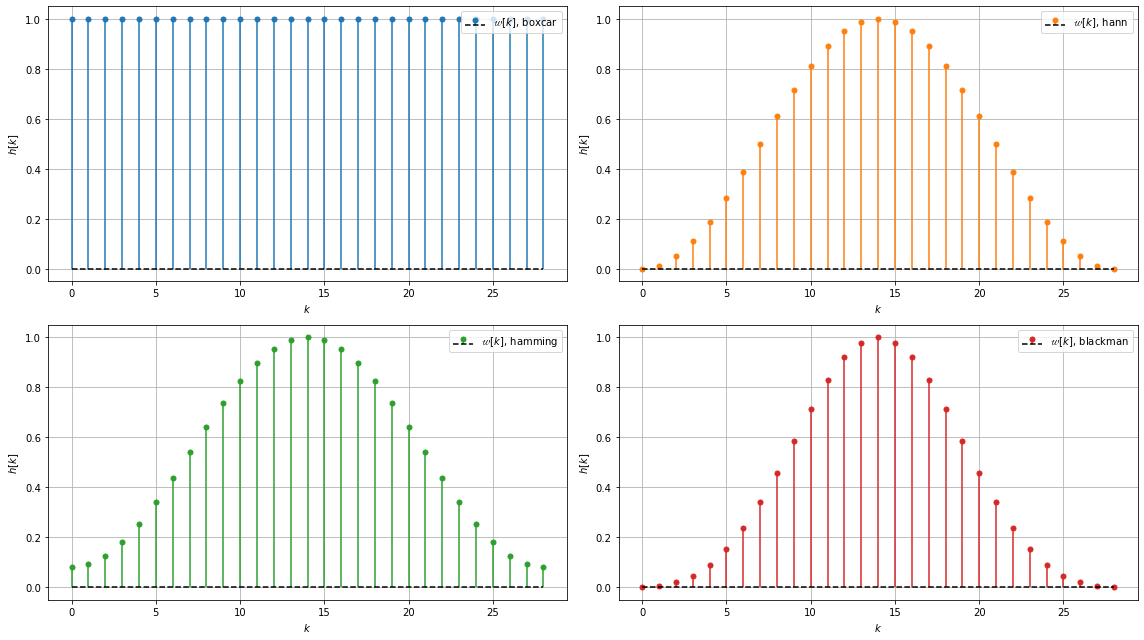

In [99]:
fig, ax = plt.subplots(figsize=(16, 9))
for i, window in enumerate(['boxcar', 'hann', 'hamming', 'blackman']):
    plt.subplot(2, 2, i+1)
    w = signal.get_window(window = window, Nx = N, fftbins = False)
    ml, sl, bl = plt.stem(np.arange(N), w, 'C%d'%i, basefmt = 'k--', markerfmt = 'o' + 'C%d'%i, 
                          label="$\mathscr{w}[k]$" + ', ' + window, use_line_collection=True)
    plt.setp(ml, markersize = 5)
    
    plt.grid()
    plt.ylabel('$h[k]$')
    plt.xlabel('$k$')

    plt.legend(loc = 'upper right')
    plt.tight_layout()
plt.show()

/tmp/ipykernel_29863/2934729754.py:5: MatplotlibDeprecationWarning:

Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.

/tmp/ipykernel_29863/2934729754.py:5: MatplotlibDeprecationWarning:

Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.

/tmp/ipykernel_29863/2934729754.py:5: MatplotlibDeprecationWarning:

Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.

/tmp/ipykernel_29863/2934729754.py:5: MatplotlibDeprecationWarning:

Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.



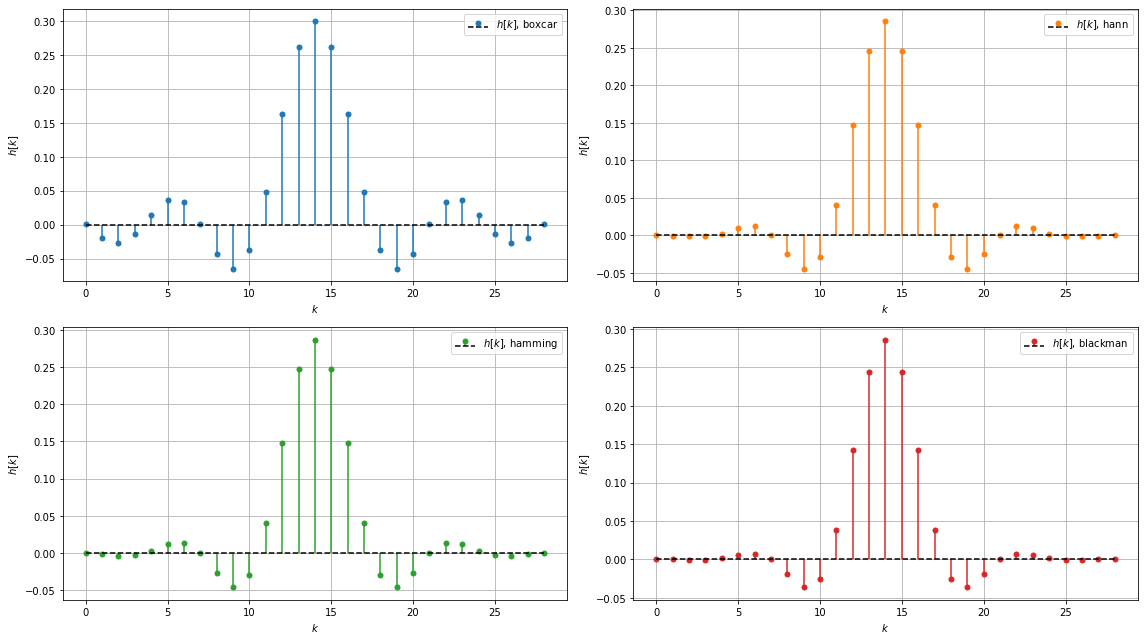

In [100]:
fig, ax = plt.subplots(figsize=(16, 9))
for i, window in enumerate(['boxcar', 'hann', 'hamming', 'blackman']):
    plt.subplot(2, 2, i+1)
    h = signal.firwin(numtaps=N, cutoff=fc, width=None, window=window, pass_zero='lowpass', fs=fs)
    ml, sl, bl = plt.stem(np.arange(N), h, 'C%d'%i, basefmt = 'k--', markerfmt = 'o' + 'C%d'%i, 
                          label="$h[k]$" + ', ' + window, use_line_collection=True)
    plt.setp(ml, markersize = 5)
    
    plt.grid()
    plt.ylabel('$h[k]$')
    plt.xlabel('$k$')

    plt.legend(loc = 'upper right')
    plt.tight_layout()
plt.show()

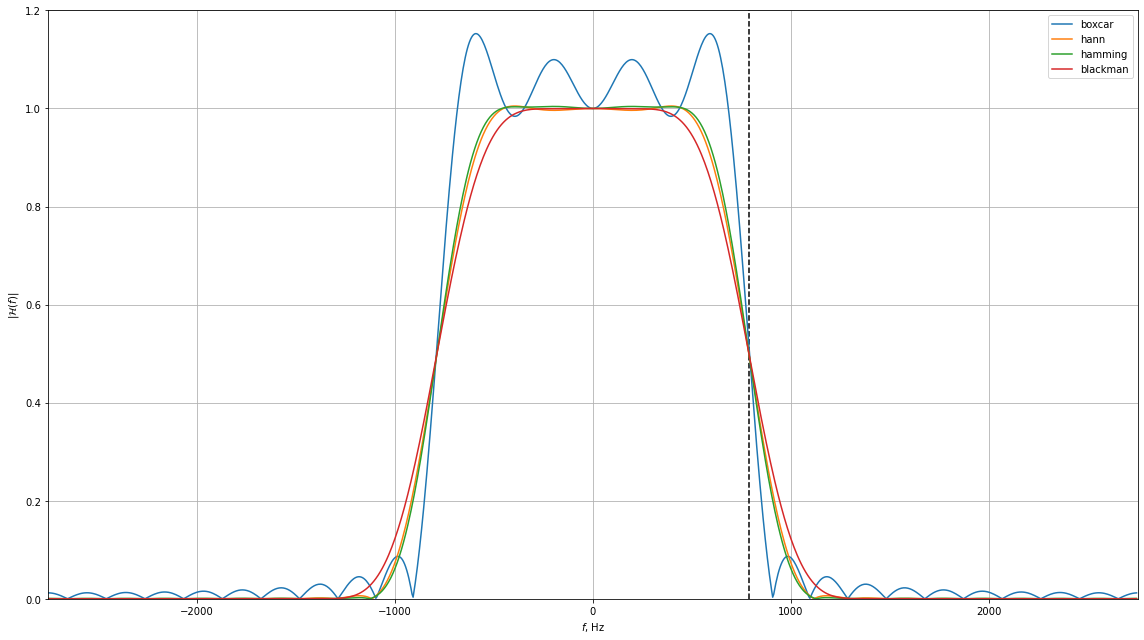

In [101]:
M=1024
fig, ax = plt.subplots(figsize=(16, 9))

plt.axvline(+fc, ls = '--', color = 'black')

for window in ['boxcar', 'hann', 'hamming', 'blackman']:
    h = signal.firwin(numtaps=N, cutoff=fc, width=None, window=window, pass_zero='lowpass', fs=fs)
    H = abs(np.fft.fftshift(np.fft.fft(h, M)))
    plt.plot(fs*(np.arange(M)/M-0.5), H, label = window)

plt.grid()
plt.ylabel('$|\mathcal{H}(f)|$')
plt.xlabel('$f$, Hz')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])

plt.legend()
plt.tight_layout()
plt.show()

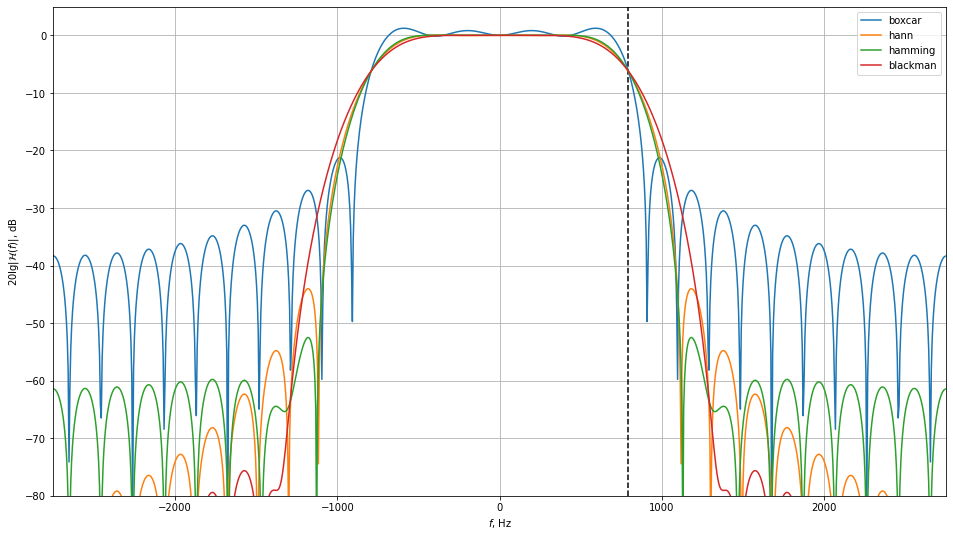

In [102]:
M=1024
fig, ax = plt.subplots(figsize=(16, 9))

plt.axvline(+fc, ls = '--', color = 'black')

for window in ['boxcar', 'hann', 'hamming', 'blackman']:
    h = signal.firwin(numtaps=N, cutoff=fc, width=None, window=window, pass_zero='lowpass', fs=fs)
    H=abs(np.fft.fftshift(np.fft.fft(h, M)))
    plt.plot(fs*(np.arange(M)/M-0.5), 20*np.log10(abs(H)), label = window)


plt.xlim([-fs/2, fs/2])
plt.xlabel("$f$, Hz")
plt.ylabel("$20 \lg |\mathcal{H}(f)|$, dB")

plt.ylim(-80, 5)
plt.grid()
plt.legend(loc='upper right')
plt.show()

### Задача 2.2. Синтез ФНЧ с окном Хемминга. 

Синтезировать КИХ-фильтр нижних частот с окном Хемминга наименьшего порядка при заданных требованиях к АЧХ:
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Воспользоваться следующей итерационной процедурой [1]:

1) Оценить длину окна по формуле 

$$\hat{N}=\left[\dfrac{3,3 f_s}{\Delta f} \right], \;\;  \Delta f=f_2-f_1$$

2) Взвесить импульсную характеристику идеального фильтра c ФЧХ $\varphi(\theta)=- \dfrac{R}{2} \theta$ окном Хэмминга выбранной длины (``scipy.firwin``, $f_c=(f_1+f_2)/2$).

$$h[k]=\left\{ \begin{matrix}
   {{h}_{\text{ideal}}}[k]w[k],  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выполняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Проверку требований к АЧХ можно произвести по графику, используя
* backend notebook `%matplotlib notebook` (в Jupyter Notebook)
* `plt.xlim()` и `plt.ylim()` (в Google Colab или в Jupyter Notebook)

Приведите графики АЧХ КИХ-фильтра с начальным ($\hat{R}=\hat{N}-1$) и конечным $R_{\min}$ порядками в итерационной процедуре. 
______

[1] Солонина, А. И. Цифровая обработка сигналов в зеркале MATLAB : учебное пособие / А. И. Солонина .— Санкт-Петербург : БХВ-Петербург, 2021 .— 560 с. — (Учебная литература для вузов).

P.S. Есть в библиотеке МФТИ. 
______

In [103]:
# N = int(2*np.ceil(3.3*fs/(f2 - f1)/2)+1)
N = int(np.ceil(3.3*fs/(f2 - f1)))
print(N)
fc=(f1+f2)/2

fig = go.Figure()

fig.add_trace(go.Scatter(x=[-fs/2, -f2, -f2], y=[20*np.log10(delta2), 20*np.log10(delta2), 10],
                         legendgroup = 'bounds', showlegend = True, 
                         mode = 'lines', line = dict(dash='dot', color = 'black'), name = 'stopband bound'))
fig.add_trace(go.Scatter(x=[f2, f2, fs/2], y=[10, 20*np.log10(delta2), 20*np.log10(delta2)], 
                        legendgroup = 'bounds', showlegend = False,
                        mode = 'lines', line = dict(dash='dot', color = 'black'), name = 'stopband bound'))
fig.add_trace(go.Scatter(x=[-f1, -f1, f1, f1], y=[-100, 20*np.log10(1-delta1), 20*np.log10(1-delta1), -100], 
                        legendgroup = 'bounds', showlegend = True,
                        mode = 'lines', line = dict(dash='dot', color = 'black'), name = 'passband bound'))
fig.add_trace(go.Scatter(x=[-f1, -f1, f1, f1], y=[10, 20*np.log10(1+delta1), 20*np.log10(1+delta1), 10], 
                        legendgroup = 'bounds', showlegend = False,
                        mode = 'lines', line = dict(dash='dot', color = 'black'), name = 'passband bound'))

M=1024*8
iter = 10
i=0
while i <= iter:
    h = signal.firwin(numtaps=N, cutoff=fc, width=None, window='hamming', pass_zero='lowpass', fs=fs)
    H=abs(np.fft.fftshift(np.fft.fft(h, M)))
    # fig.add_trace(go.Scatter(x=fs*(np.arange(M)/M-0.5), y=abs(H), mode = 'lines', line = dict(dash='solid'), name = f"N = {N}, R = {N-1}"))

    print(max(abs(H[np.logical_and(fs*(np.arange(M)/M-0.5)>=0,fs*(np.arange(M)/M-0.5)<=f1)]-1)), delta1)
    print(np.max(20*np.log10(abs(H))[np.logical_and(fs*(np.arange(M)/M-0.5)>=f2,fs*(np.arange(M)/M-0.5)<=fs-f2)]), 20*np.log10(delta2))

    if max(abs(H[np.logical_and(fs*(np.arange(M)/M-0.5)>=0,fs*(np.arange(M)/M-0.5)<=f1)]-1)) <= delta1 and \
        np.max(20*np.log10(abs(H))[np.logical_and(fs*(np.arange(M)/M-0.5)>=f2,fs*(np.arange(M)/M-0.5)<=fs-f2)]) <= 20*np.log10(delta2):
      fig.add_trace(go.Scatter(x=fs*(np.arange(M)/M-0.5), y=20*np.log10(abs(H)), mode = 'lines', line = dict(dash='solid'), name = f"N = {N}, R = {N-1}"))
      N -= 5
    else:
      N += 1
    i += 1

fig.update_yaxes(title_text="|H(f)|, dB")
fig.update_xaxes(title_text="f, Hz")
fig.update_xaxes(range=[-fs/2, fs/2])
fig.update_yaxes(range=[-100, 10])
fig.update_xaxes(showspikes=True, spikecolor="red", spikethickness=2)
fig.update_yaxes(showspikes=True, spikecolor="red", spikesnap="cursor", spikemode="across", spikethickness=2)

fig.update_layout(height=800, width=1500,)
fig.update_layout(hoverlabel_namelength=-1)
fig.write_html('task_22.html')
fig.show()

66
0.0034703485411448076 0.05
-48.80817341316296 -33.979400086720375
0.011389594564341299 0.05
-39.933117125532135 -33.979400086720375
0.017057115995993355 0.05
-34.30175523039962 -33.979400086720375
0.03396288992338803 0.05
-29.764287197484734 -33.979400086720375
0.03046538555819911 0.05
-30.630142943035878 -33.979400086720375
0.026998765258051116 0.05
-31.39178342635362 -33.979400086720375
0.023487604944894214 0.05
-32.168180253292576 -33.979400086720375
0.020069293964057766 0.05
-33.11650719065121 -33.979400086720375
0.017057115995993355 0.05
-34.30175523039962 -33.979400086720375
0.03396288992338803 0.05
-29.764287197484734 -33.979400086720375
0.03046538555819911 0.05
-30.630142943035878 -33.979400086720375


/tmp/ipykernel_29863/2940257080.py:30: RuntimeWarning:

divide by zero encountered in log10

/tmp/ipykernel_29863/2940257080.py:33: RuntimeWarning:

divide by zero encountered in log10

/tmp/ipykernel_29863/2940257080.py:34: RuntimeWarning:

divide by zero encountered in log10



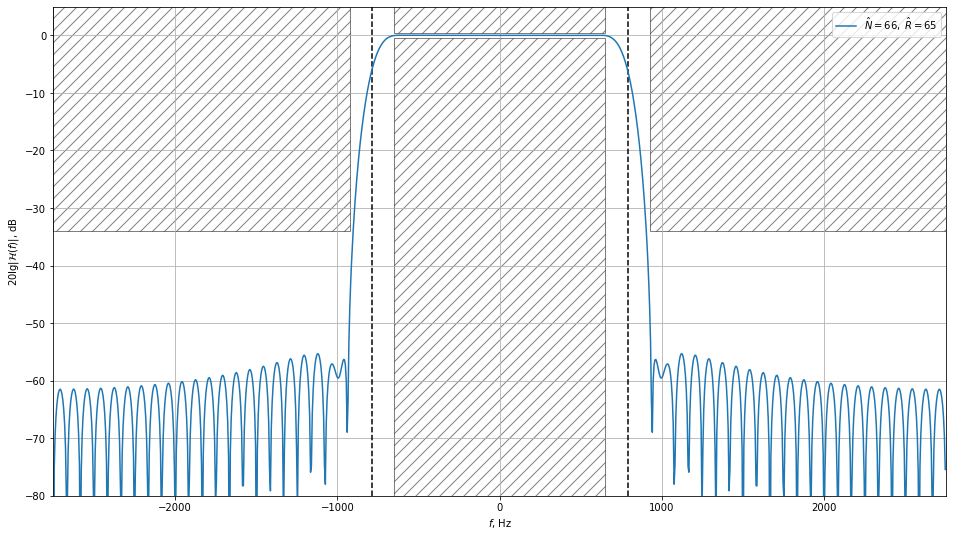

In [104]:
fc=(f1+f2)/2

M=1024
fig, ax = plt.subplots(figsize=(16, 9))

plt.axvline(+fc, ls = '--', color = 'black')
plt.axvline(-fc, ls = '--', color = 'black')

for N in [66]:
    h = signal.firwin(numtaps=N, cutoff=fc, width=None, window='hamming', pass_zero='lowpass', fs=fs)
    H=abs(np.fft.fftshift(np.fft.fft(h, M)))
    plt.plot(fs*(np.arange(M)/M-0.5), 20*np.log10(abs(H)), label = f'$\hatN = {N},\; \hatR = {N-1}$')


plt.xlim([-fs/2, fs/2])
plt.xlabel("$f$, Hz")
plt.ylabel("$20 \lg |\mathcal{H}(f)|$, dB")

plt.fill([-f1,-f1, f1, f1], [-100, 20*np.log10(1-delta1), 20*np.log10(1-delta1), -100], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill([-fs/2,-fs/2, -f2, -f2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill([f2,f2, fs/2, fs/2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill([-f1,-f1, f1, f1], [10, 20*np.log10(1+delta1), 20*np.log10(1+delta1), 10], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')

plt.ylim(-80, 5)
plt.grid()
plt.legend(loc='upper right')
plt.show()

## Задача 2.3. Синтез ФНЧ с окном Кайзера.

Синтезировать КИХ-фильтр нижних частот с окном Кайзера наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Параметр $\beta$ и длину окна $N$ определить по эмпирическим формулам, приведенным в лекции, или с помощью функции `signal.kaiserord`. Привести график АЧХ получившегося фильтра, сравнить порядок с фильтром из задачи 2.2. 

In [105]:
print(int(np.ceil((-20*np.log10(delta2) - 7.95) * 0.5*fs/(2.285 * np.pi * (f2 - f1)))),
      0.5842*(-20*np.log10(delta2)-21)**0.4 + 0.07886*(-20*np.log10(delta2)-21))

37 2.652339138368929


In [108]:
N, beta=signal.kaiserord(ripple=-20*np.log10(delta2), width=2*(f2-f1)/fs)
N, beta

(38, 2.652339138368929)

/tmp/ipykernel_29863/666260824.py:11: RuntimeWarning:

divide by zero encountered in log10



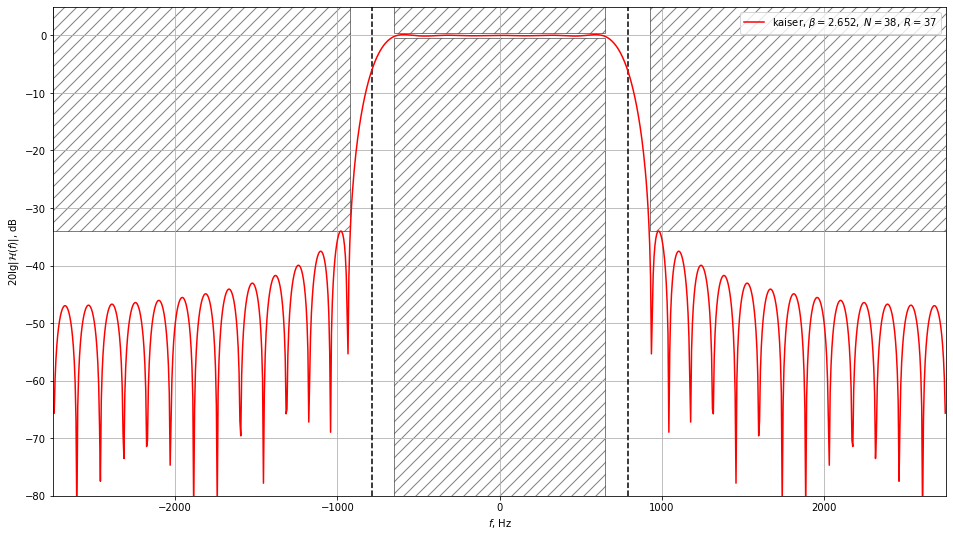

In [109]:
fc=(f1+f2)/2

M=1024
fig, ax = plt.subplots(figsize=(16, 9))

plt.axvline(+fc, ls = '--', color = 'black')
plt.axvline(-fc, ls = '--', color = 'black')

h = signal.firwin(numtaps=N, cutoff=fc, width=None, window=('kaiser', beta), pass_zero='lowpass', fs=fs)
H=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.plot(fs*(np.arange(M)/M-0.5), 20*np.log10(abs(H)), 'r', label = f'kaiser, $\\beta = {round(beta, 3)}, \; N = {N},\; R = {N-1}$')


plt.xlim([-fs/2, fs/2])
plt.xlabel("$f$, Hz")
plt.ylabel("$20 \lg |\mathcal{H}(f)|$, dB")

plt.fill([-f1,-f1, f1, f1], [-100, 20*np.log10(1-delta1), 20*np.log10(1-delta1), -100], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill([-fs/2,-fs/2, -f2, -f2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill([f2,f2, fs/2, fs/2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill([-f1,-f1, f1, f1], [10, 20*np.log10(1+delta1), 20*np.log10(1+delta1), 10], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')

plt.ylim(-80, 5)
plt.grid()
plt.legend(loc='upper right')
plt.show()

#  Модуль 3. Оптимизационные методы синтеза КИХ-фильтров

## Задача 3.1. Метод наименьших квадратов.

Синтезировать КИХ-фильтр методом наименьших квадратов наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.firls`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_\min$ в итерационной процедуре. 

In [139]:
bands = np.array([0, f1, f2, fs/2])
desired = np.array([1, 1, 0, 0])
weight = np.array([delta2, delta1])*10

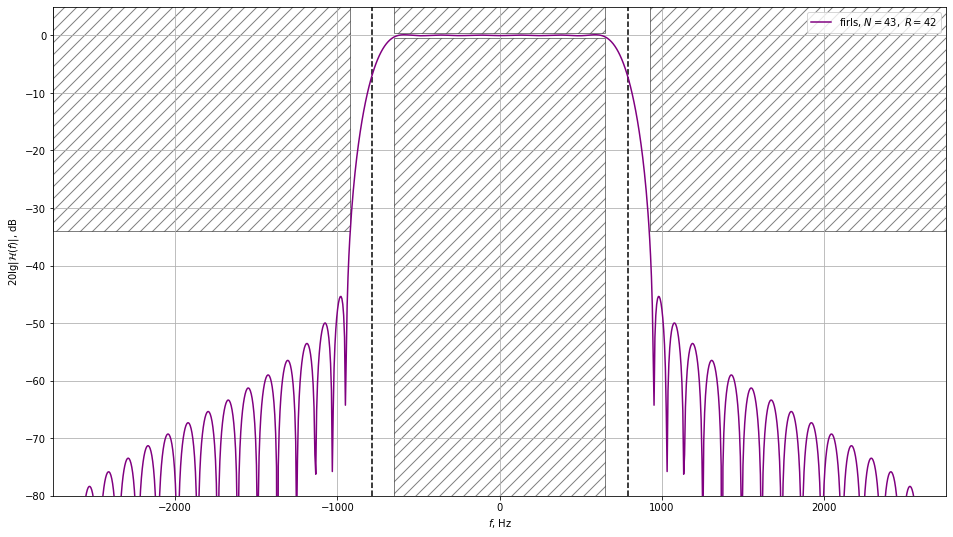

In [150]:
fc=(f1+f2)/2

M=1024
fig, ax = plt.subplots(figsize=(16, 9))

plt.axvline(+fc, ls = '--', color = 'black')
plt.axvline(-fc, ls = '--', color = 'black')

N = 43
h = signal.firls(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)
H=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.plot(fs*(np.arange(M)/M-0.5), 20*np.log10(abs(H)), 'purple', label = f'firls, $N = {N},\; R = {N-1}$')


plt.xlim([-fs/2, fs/2])
plt.xlabel("$f$, Hz")
plt.ylabel("$20 \lg |\mathcal{H}(f)|$, dB")

plt.fill([-f1,-f1, f1, f1], [-100, 20*np.log10(1-delta1), 20*np.log10(1-delta1), -100], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill([-fs/2,-fs/2, -f2, -f2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill([f2,f2, fs/2, fs/2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill([-f1,-f1, f1, f1], [10, 20*np.log10(1+delta1), 20*np.log10(1+delta1), 10], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')

plt.ylim(-80, 5)
plt.grid()
plt.legend(loc='upper right')
plt.show()

## Задача 3.2. Метод равномерной чебышевской аппроксимации.

Синтезировать КИХ-фильтр методом равномерной чебышевской аппроксимации наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.remez`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_\min$ в итерационной процедуре. 

In [129]:
bands = np.array([0, f1, f2, fs/2])
desired = np.array([1, 0])
weight = np.array([delta2, delta1])*10

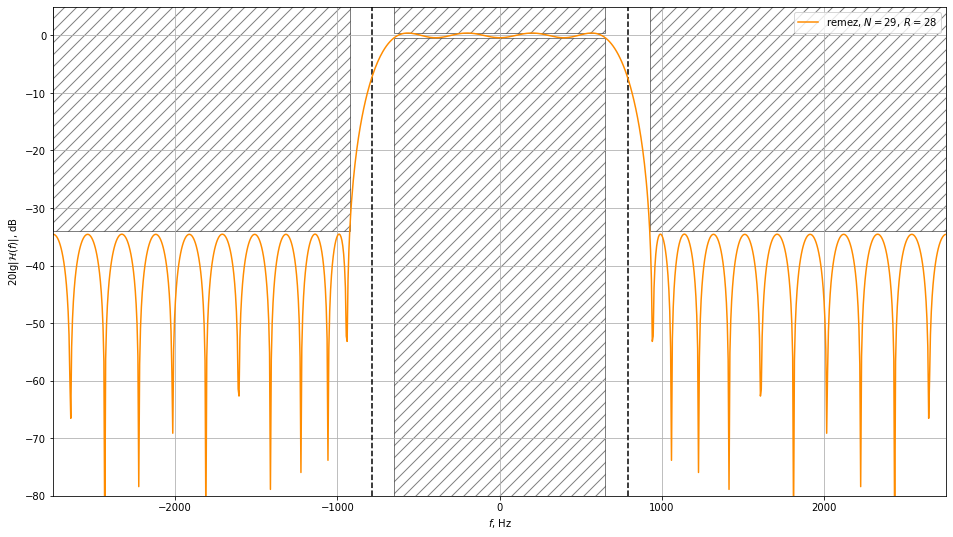

In [137]:
M=1024
fig, ax = plt.subplots(figsize=(16, 9))

plt.axvline(+fc, ls = '--', color = 'black')
plt.axvline(-fc, ls = '--', color = 'black')

N = 29
h = signal.remez(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)
H=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.plot(fs*(np.arange(M)/M-0.5), 20*np.log10(abs(H)), 'darkorange', label = f'remez, $N = {N},\; R = {N-1}$')


plt.xlim([-fs/2, fs/2])
plt.xlabel("$f$, Hz")
plt.ylabel("$20 \lg |\mathcal{H}(f)|$, dB")

plt.fill([-f1,-f1, f1, f1], [-100, 20*np.log10(1-delta1), 20*np.log10(1-delta1), -100], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill([-fs/2,-fs/2, -f2, -f2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill([f2,f2, fs/2, fs/2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill([-f1,-f1, f1, f1], [10, 20*np.log10(1+delta1), 20*np.log10(1+delta1), 10], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')

plt.ylim(-80, 5)
plt.grid()
plt.legend(loc='upper right')
plt.show()

## Задача 3.3. Сравнение результатов.

Сравнить минимальные порядки КИХ-фильтров, которые получились в задачах 2.2, 2.3, 3.1 и 3.2. Заполнить таблицу.


|                                             	| $R_{\min}$ 	| $N_{\min}$ 	|
|:---------------------------------------------:|:---------:|:---------:|
| Оконный метод (окно Хэмминга)               	|     66   	|     65   	|
| Оконный метод (окно Кайзера)                	|     37   	|     38   	|
| Метод наименьших квадратов                  	|     42   	|     43  	|
| Метод равномерной чебышевской аппроксимации 	|     28   	|     29   	|

Определить, будут ли выполняться требование из этих задач для фильтра минимального из получившихся порядков, построенного методом частотной выборки (как в задаче 1.2).

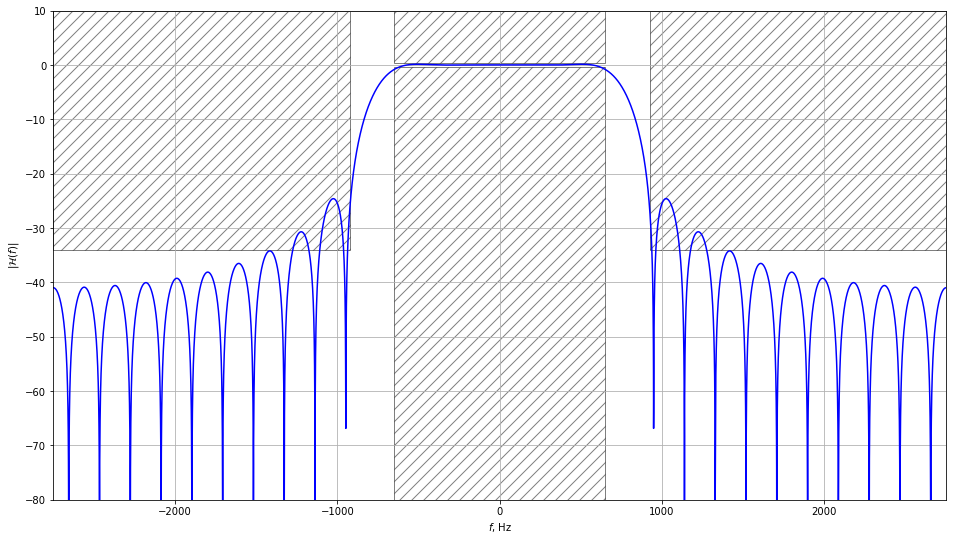

In [151]:
@np.vectorize
def ideal_lowpass_continuous(f, fs, f1, f2):
    if f <= 0:
        f = fs - f
    if 0 <= f <= f1 or fs-f1 <= f <=  fs:
        return 1.0
    elif f1 < f < f2: 
        return f/(f1-f2)+(f2/(f2-f1))
    elif fs-f2 < f < fs-f1:
        return f/(f2-f1)+(fs-f2)/(-f2+f1)
    else:
        return 0.0 
    
N=29
fc=(f1+f2)/2

plt.figure(figsize=(16, 9))
H = ideal_lowpass_continuous(fs*(np.arange(N)/N), fs = fs, f1 = f1, f2 = f2)
h = np.roll(np.fft.ifft(H), N//2)
M = 1024*8
H1 = abs(np.fft.fft(h, M))
plt.plot(fs*(-0.5 + np.arange(M)/M), 20*np.log10(abs(np.fft.fftshift(H1))), color = 'blue')
plt.fill([-f1,-f1, f1, f1], [-100, 20*np.log10(1-delta1), 20*np.log10(1-delta1), -100], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill([-fs/2,-fs/2, -f2, -f2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill([f2,f2, fs/2, fs/2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')
plt.fill([-f1,-f1, f1, f1], [10, 20*np.log10(1+delta1), 20*np.log10(1+delta1), 10], edgecolor = 'k', hatch = '//',  alpha = 0.5, facecolor = 'white')

plt.xlim(-fs/2., +fs/2.)
plt.ylim(-80, 10)
plt.xlabel("$f$, Hz")
plt.ylabel("$|\mathcal{H}(f)|$")
plt.grid()
plt.show()